 Data : https://www.kaggle.com/datasets/uciml/iris 

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('../Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


cheack for any duplicated rows: 

In [3]:
df.duplicated().sum()

0

missing values: 

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

some informations about the data :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


drop unnecessary columns:

In [7]:
df.drop('Id', axis=1, inplace=True)

cheacking the duplicated rows again:

In [27]:
df.duplicated().sum()

3

In [28]:
# drop duplicates :
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

### univariate analysis:

In [29]:
df['SepalLengthCm'].describe()

count    147.000000
mean       5.856463
std        0.829100
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

<Axes: xlabel='SepalLengthCm'>

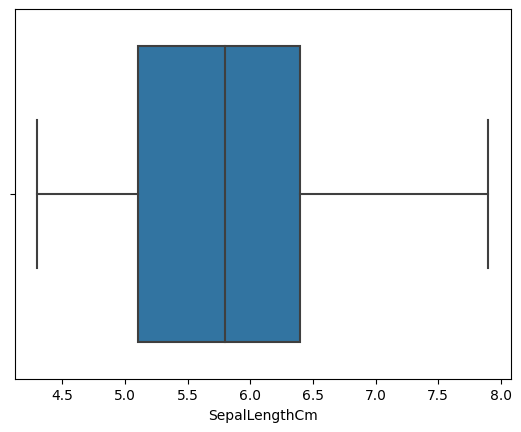

In [30]:
sns.boxplot(data=df, x='SepalLengthCm')

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

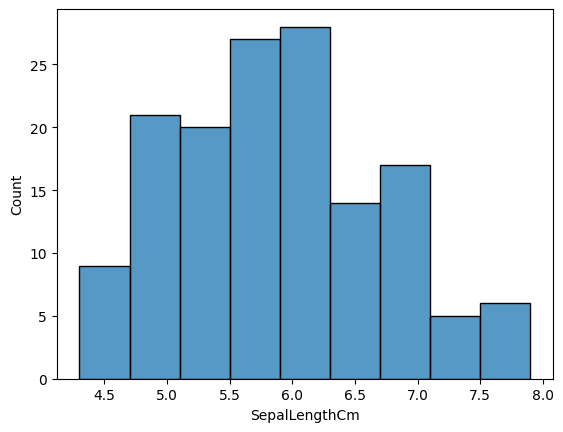

In [31]:
sns.histplot(data=df, x='SepalLengthCm')

In [14]:
df['SepalWidthCm'].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

<Axes: xlabel='SepalWidthCm'>

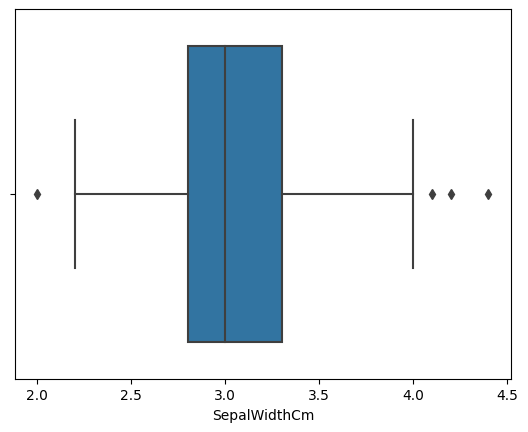

In [32]:
sns.boxplot(data=df, x='SepalWidthCm')

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

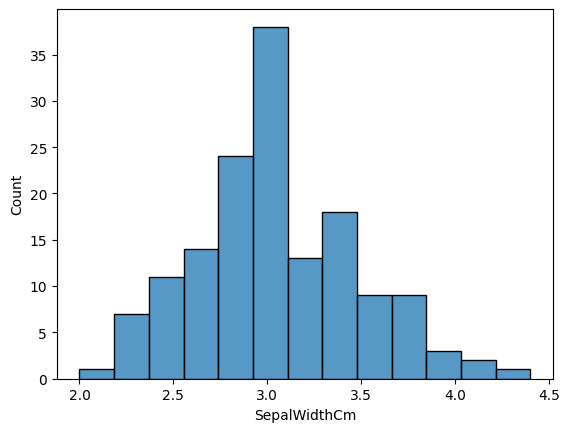

In [17]:
sns.histplot(data=df, x='SepalWidthCm')

In [19]:
df['PetalLengthCm'].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64

<Axes: xlabel='PetalLengthCm'>

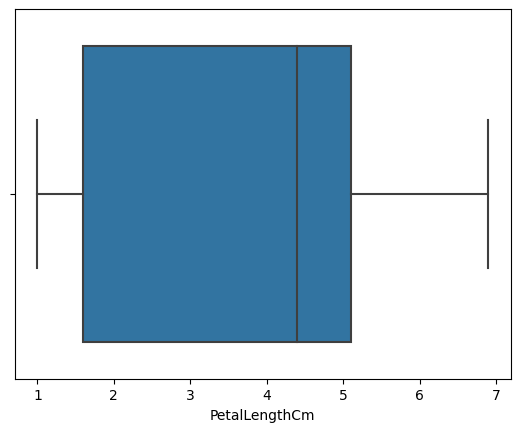

In [33]:
sns.boxplot(data=df, x='PetalLengthCm')

In [22]:
df['PetalWidthCm'].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64

<Axes: xlabel='PetalWidthCm'>

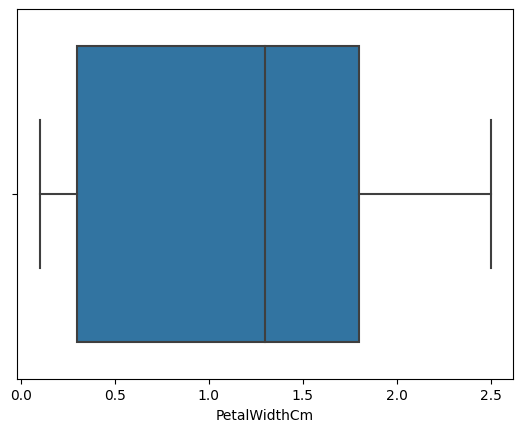

In [34]:
sns.boxplot(data=df, x='PetalWidthCm')

In [36]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [35]:
df['Species'].value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

### bivariate analysis:

In [44]:
px.histogram(data_frame=df , x = "PetalWidthCm" , color= "Species", barmode='group')

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

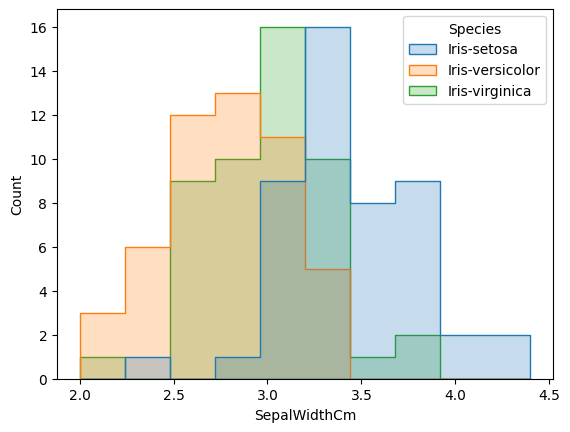

In [50]:
sns.histplot(data=df, x='SepalWidthCm', hue='Species', element='step' ,bins=10, common_norm=True)

encode the values of `Species` column :

In [51]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [52]:
Species_dict = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}

In [ ]:
df['Species'] = df['Species'].map(Species_dict)

In [57]:
x = df.drop('Species', axis=1)
y = df['Species']

split into train and test sets: 

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=7)

scaling the values:

In [63]:
scaler = StandardScaler()

In [64]:
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])

Use LogisticRegression model on this data :

In [66]:
model = LogisticRegression(multi_class='ovr')

In [67]:
model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [68]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [70]:
print(f'train accuracy : {accuracy_score(y_true=y_train, y_pred=y_train_pred)}')
print(f'test accuracy : {accuracy_score(y_true=y_test, y_pred=y_test_pred)}')

train accuracy : 0.9316239316239316
test accuracy : 0.9333333333333333


Printing the prameters:

In [71]:
model.coef_

array([[-0.99960384,  1.24613651, -1.60049877, -1.48819244],
       [ 0.19527019, -1.48104629,  0.44450351, -0.6974298 ],
       [ 0.05679006, -0.28628024,  2.27212058,  2.79879163]])

In [73]:
x_test.iloc[10].to_frame().transpose()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
23,-0.919313,0.542051,-1.191089,-0.941863


In [74]:
y_test.iloc[10]

1

In [75]:
model.predict(x_test.iloc[10].to_frame().transpose())

array([1], dtype=int64)

In [76]:
model.predict_proba(x_test.iloc[10].to_frame().transpose())

array([[8.65025231e-01, 1.34837627e-01, 1.37141885e-04]])

confusion matrix:

In [79]:
print(f'train confusion matrix :\n {confusion_matrix(y_true=y_train, y_pred=y_train_pred)}')
print(f'test confusion matrix :\n {confusion_matrix(y_true=y_test, y_pred=y_test_pred)}')

train confusion matrix :
 [[38  0  0]
 [ 0 36  4]
 [ 0  4 35]]
test confusion matrix :
 [[ 9  1  0]
 [ 0  9  1]
 [ 0  0 10]]


In [80]:
px.imshow(confusion_matrix(y_true=y_train, y_pred=y_train_pred), text_auto=True)

In [82]:
px.imshow(confusion_matrix(y_true=y_test, y_pred=y_test_pred), text_auto=True)

In [83]:
C = [10 , 0.1 , 0.2 , 0.05]
for c in C :
    x_train , x_test , y_train , y_test  = train_test_split(x,y,train_size=0.8 , stratify=y  ,random_state=7)
    scaler = StandardScaler()
    x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
    x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])
    model = LogisticRegression(multi_class="ovr" , C = c) #using l2 norm.
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print(f"Train Accuracy is {accuracy_score(y_true=y_train , y_pred=y_train_pred)}")
    print(f"Test Accuracy is {accuracy_score(y_true=y_test , y_pred=y_test_pred)}")
    print(f"Model Coeff are : \n {model.coef_}")
    print("*" * 100)

Train Accuracy is 0.9487179487179487
Test Accuracy is 1.0
Model Coeff are : 
 [[-1.48024611  1.91305724 -2.50277297 -2.31910498]
 [ 0.12632082 -1.56881692  1.14029256 -1.35986226]
 [-0.88865713 -0.94855291  5.76135796  5.39754674]]
****************************************************************************************************
Train Accuracy is 0.8888888888888888
Test Accuracy is 0.8666666666666667
Model Coeff are : 
 [[-0.57289149  0.65450999 -0.85047618 -0.8010767 ]
 [ 0.03571012 -0.86406493  0.15812209 -0.12133008]
 [ 0.40592057  0.06770883  0.76588     0.97974757]]
****************************************************************************************************
Train Accuracy is 0.8974358974358975
Test Accuracy is 0.8666666666666667
Model Coeff are : 
 [[-0.69519418  0.82144385 -1.05824336 -0.99194381]
 [ 0.07696759 -1.09795192  0.20229012 -0.24898228]
 [ 0.37853149  0.04855999  1.05008811  1.37901505]]
************************************************************************

In [85]:
C = [10 , 0.1 , 0.2 , 0.05 , 0.005]
for c in C :
    x_train , x_test , y_train , y_test  = train_test_split(x,y,train_size=0.8 , stratify=y  ,random_state=7)
    scaler = StandardScaler()
    x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
    x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])
    model = LogisticRegression(multi_class="ovr" , C = c ,solver="liblinear" ,penalty = "l1") # using L1 norm.
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print(f"Train Accuracy is {accuracy_score(y_true=y_train , y_pred=y_train_pred)}")
    print(f"Test Accuracy is {accuracy_score(y_true=y_test , y_pred=y_test_pred)}")
    print(f"Model Coeff are : \n {model.coef_}")
    print("*" * 100)

Train Accuracy is 0.9658119658119658
Test Accuracy is 1.0
Model Coeff are : 
 [[ 0.          1.97600242 -5.76939378 -0.77614152]
 [ 0.08802275 -1.55622355  1.2389467  -1.42100149]
 [-1.72557819 -1.2458432   9.69468338  6.91467768]]
****************************************************************************************************
Train Accuracy is 0.8717948717948718
Test Accuracy is 0.8666666666666667
Model Coeff are : 
 [[ 0.          0.32714027 -1.8570747   0.        ]
 [ 0.         -0.71867276  0.          0.        ]
 [ 0.          0.          0.          1.48692078]]
****************************************************************************************************
Train Accuracy is 0.8803418803418803
Test Accuracy is 0.9
Model Coeff are : 
 [[ 0.          0.58697961 -2.48546592  0.        ]
 [ 0.         -1.06123406  0.          0.        ]
 [ 0.          0.          0.          2.34913539]]
***************************************************************************************

Thanks ❤️